In [15]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')


In [23]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
y = iris['target']

setosa_or_versicolor = (y==0)|(y==1)
X = X[setosa_or_versicolor]
y =y[setosa_or_versicolor]

svm_clf = SVC(kernel='linear',C=float('inf'))
svm_clf.fit(X,y)

SVC(C=inf, kernel='linear')

(np.float64(0.0), np.float64(5.5), np.float64(0.0), np.float64(2.0))

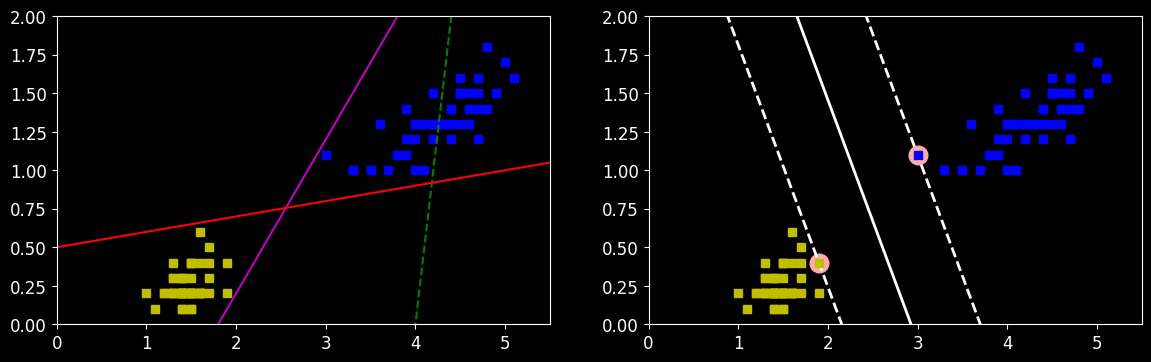

In [40]:
x0 = np.linspace(0,5.5,200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1*x0+0.5

def plt_svc_decision_boundary(svm_clf,xmin,xmax,sv=True):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin,xmax,200)
    decision_boundary = -w[0]/w[1]*x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    if sv: 
        svs = svm_clf.support_vectors_
        plt.scatter(svs[:,0],svs[:,1],s=180, facecolors ='#FFAAAA')
    plt.plot(x0,decision_boundary,'w-',linewidth =2)
    plt.plot(x0,gutter_up,'w--',linewidth =2)
    plt.plot(x0,gutter_down,'w--',linewidth =2)
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plt.plot(X[:,0][y==0],X[:,1][y==0],'ys')
plt.plot(x0,pred_1,'g--')
plt.plot(x0,pred_2,'m-')
plt.plot(x0,pred_3,'r-')
plt.axis([0,5.5,0,2.0])

plt.subplot(122)
plt_svc_decision_boundary(svm_clf,0,5.5)
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plt.plot(X[:,0][y==0],X[:,1][y==0],'ys')
plt.axis([0,5.5,0,2.0])


In [44]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
y = (iris["target"]==2).astype(np.float64)

svm_clf = Pipeline((
    ('std',StandardScaler()),
    ('linear_svc',LinearSVC(C=1))
))
svm_clf.fit(X,y)

Pipeline(steps=[('std', StandardScaler()), ('linear_svc', LinearSVC(C=1))])

In [45]:
svm_clf.predict([[5.5,1.7]])

array([1.])

In [48]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1,random_state=42)
svm_clf2 = LinearSVC(C=100,random_state=42)

scaled_svm_clf1 = svm_clf = Pipeline((
    ('std',StandardScaler()),
    ('linear_svc',svm_clf1)
))

scaled_svm_clf2 = svm_clf = Pipeline((
    ('std',StandardScaler()),
    ('linear_svc',svm_clf2)
))
scaled_svm_clf1.fit(X,y)
scaled_svm_clf2.fit(X,y)

Pipeline(steps=[('std', StandardScaler()),
                ('linear_svc', LinearSVC(C=100, random_state=42))])

In [53]:
from sklearn.svm import SVC

poly_kernek_svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="poly",degree=3,coef0=1,C=5))
])

poly_kernek_svm_clf.fit(X,y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [54]:
poly100_kernek_svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="poly",degree=10,coef0=1,C=5))
])

poly_kernek_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])